In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import quad
from progressbar import progressbar as pbar
from rlxutils import subplots, copy_func

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

%matplotlib inline

In [101]:
def get_distribution(c0=3, c1=2, scale1=5, scale2=1, shift1=-.5, shift2=0):
    d = tfd.Beta(concentration0=c0, concentration1=c1)
    b = tfb.Chain( [ tfb.Scale(scale2), tfb.Shift(shift2), tfb.Tanh(), tfb.Scale(scale1), tfb.Shift(shift1)])
    t = tfd.TransformedDistribution(d, b)
    return d,t


def get_distribution(c0=3, c1=2, scale=5, shift=-.5):
    d = tfd.Beta(concentration0=c0, concentration1=c1)
    b = tfb.Chain( [ tfb.Scale(scale), tfb.Shift(shift)])
    t = tfd.TransformedDistribution(d, b)
    return d,t

In [141]:
def sample_params():
    c0 = np.random.random()*3 + 0.5
    c1 = c0 + np.random.random()*c0/2 - c0/4
    scale = np.random.random()*5
    shift = np.random.random()*10-5
    r = {"c0": c0, "c1": c1, "scale": scale, "shift": shift}
    r = {k:np.float64(v) for k,v in r.items()}
    return r

{'c0': 0.7958050594340468, 'c1': 0.8124183575913304, 'scale': 2.703345072502823, 'shift': 4.199572633342795}
{'c0': 3.107209728683727, 'c1': 2.764995591949835, 'scale': 4.1087377159761935, 'shift': 4.641130410791476}
{'c0': 1.0434639889434627, 'c1': 0.963683525792928, 'scale': 2.352219671984173, 'shift': -4.090404709609009}
{'c0': 0.5683625575118215, 'c1': 0.4966392035544659, 'scale': 1.1720528551933969, 'shift': 0.6904932430009829}
{'c0': 0.8135550799332785, 'c1': 0.622810030858371, 'scale': 3.7707928286726626, 'shift': 3.4187630269471843}
{'c0': 2.7629061638430517, 'c1': 3.2095214014608633, 'scale': 2.56404261545962, 'shift': 0.6866346941531383}
{'c0': 2.9543924671524087, 'c1': 3.2993945101669375, 'scale': 2.1095744346243936, 'shift': 2.6337126875862467}
{'c0': 1.4370987899993626, 'c1': 1.234608017630638, 'scale': 0.6174278948115802, 'shift': -1.6531431436483848}
{'c0': 1.2210680204247046, 'c1': 1.524255062089357, 'scale': 3.011338620948823, 'shift': 4.071783841982139}
{'c0': 0.71662

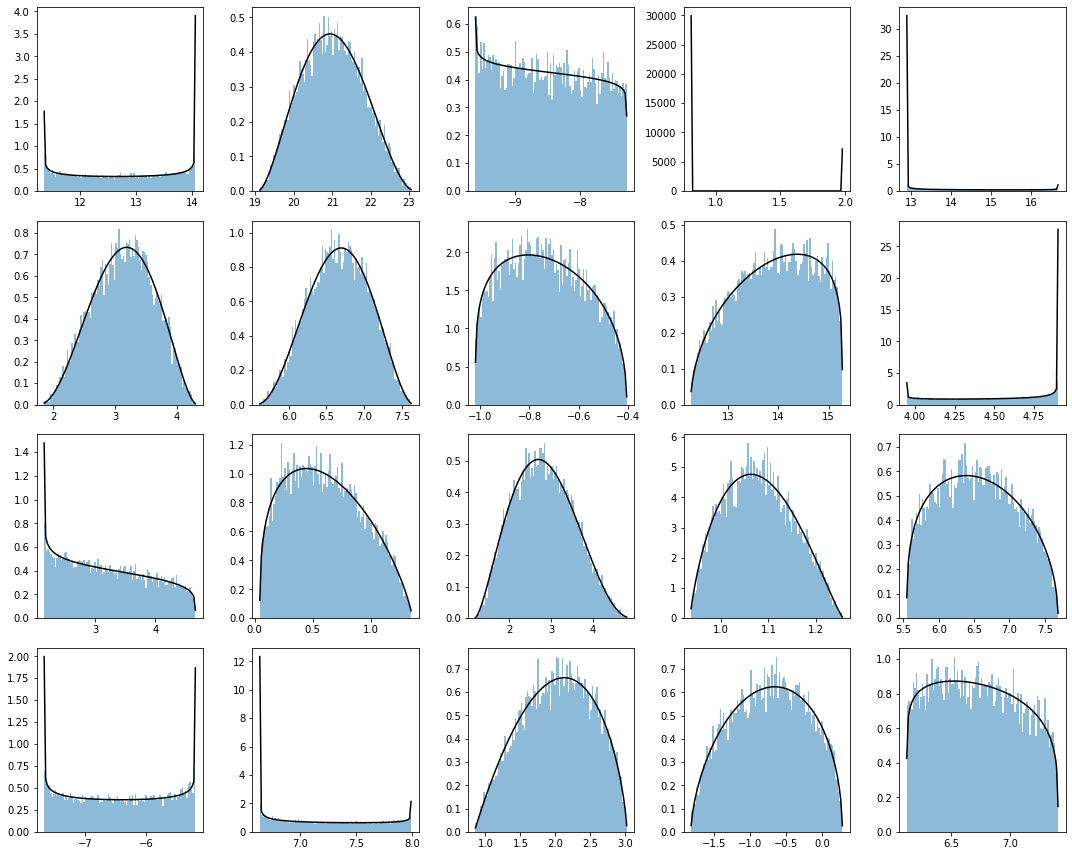

In [142]:
for ax,i in subplots(20, n_cols=5):
    params = sample_params()
    d,t = get_distribution(**params)

    td = t.sample(10000).numpy()
    plt.hist(td, bins=100, alpha=.5, density=True);
    
    xr = np.linspace(np.min(td), np.max(td), 100)
    plt.plot(xr, np.exp(t.log_prob(xr).numpy()), color="black")
    
    print (params)
    
plt.tight_layout()